# TODO

- Merge Patryk's Notebook
- Development
  - Get the two CO2 datasets linked to provide and annual and/or monthly value
  - Combined with the "year" column in the main dataframe 
  - Plot CO2 against temperature (and/or plot them both on the same graph (different axes?) against time
  - Filter the Mauna Loa observations to get an average for each year
  - Expand the ice-core data to give the same values for each month where we only have a year. 
    - It makes sense to slice and/or combine them to cover the same years as the UK temperature data?
- Clean up code
  - Remove commented code
  - Add comments and documentation to code
  - Use pep8
  - Make sure all code is in functions
  - Make code more concise
  - Move visualisation code to visualisation section
- Remove old documentation
- Complete documentation (add from outline docx)
- Proofread

## COMP5721M: Programming for Data Science 

## Coursework 3: Data Analysis Project

Last modified: 3 December 2023

# MET Office Data Analysis: Is There Evidence for Global Warming in the UK?

* Omar Choudhry, sc20osc@leeds.ac.uk / scsoc@leeds.ac.uk
* David Marples, edu9d2m@leeds.ac.uk
* Riham Hlis, scrhl@leeds.ac.uk
* Patryk Wasniewski, bs19pw@leeds.ac.uk

# Project Plan

## The Data (10 marks)

https://www.metoffice.gov.uk/research/climate/maps-and-data/uk-and-regional-series

There are freely available datasets (as text files) from the met office at the level of the whole UK, monthly. These cover mean temperature, rainfall, number of rainfall days, and number of sunshine days. Our current version already has these.

Additional data is available with daily resolution, on a grid over the UK that would allow finer resolution (for example, “Yorkshire rainfall over a rolling week”), but (a) you need to be registered (which I (David) am), (b) this data is in .nc format, (c) there are separate files for each year, and (d) it potentially is a HUGE dataset.

- Intro about climate change and the meteorological factors including Ozone.
- We need to describe how we split the dataset and combine the ozone dataset.

## Project Aim and Objectives (5 marks)

__Objective__: To use MetOffice data to investigate what evidence there is that average temperatures are rising in the UK, and whether this is associated with changes in rainfall/temperature and maybe sunshine patterns.

__Hypothesis__: UK temperatures have been rising on average. Since this implies higher energy in the atmosphere, this is associated with more extreme weather events (more heatwaves and intense periods of rainfall, and possibly more rainfall overall).

To use MetOffice (and other relevant) data to investigate what evidence there is that average temperatures are rising in the UK, and whether this is associated with changes in rainfall/temperature and maybe sunshine patterns. 
Corellation maybe by means of visualisation : find correspondences between different attributes within a dataset 
1 testing the changes in meteorological factors over decades  
a mean temperature  
b rainfull  
c sunshine  
2 test whether high/low temperatures correlate with more intense rainfall/sunshine 
3 test whether the above meteorological factors correlate with Ground-Level Ozone Concentration 

### Background

- It has been postulated that global atmospheric CO<sub>2</sub> levels have been rising due to anthropogenic fossil fuel use, and that this is leading to climate change because of the "greenhouse" effects of CO<sub>2</sub>. Specifically, this should lead to a global rise in average temperature, due to trapping of heat from insolation. 
- It has been argued that this increase in temperature will be associated with more extreme weather events, which could include storms and heatwaves. 
- An increase in heatwaves could be predicted to lead to an increase in deaths due to heat stress: patients cardiovascular and respiratory diseases are thought to be particularly susceptible to such effects.

__Aim__: In this project we will use a range of data sources to investigate whether there is evidence that these changes are happening in the UK, and in Yorkshire specifically.

__Objective__: To use MetOffice data to investigate what evidence there is that average temperatures are rising in the UK, and whether this is associated with changes in rainfall/temperature and maybe sunshine patterns.

__Hypotheses__: (1) UK temperatures have been rising on average. 
(2) Since this implies higher energy in the atmosphere, this is associated with more extreme weather events (more heatwaves and intense periods of rainfall, and possibly more rainfall overall). 
(3) Furthermore, it is hypothesised that an increase in respiratory disease will be detectable.

### Specific Objective(s)

* __Objective 1:__ <u>Test whether UK mean temperature and rainfall have been higher in recent years</u> than in the late years of the 19th century. Temperature data will be obtained, converted into a `Pandas` data frame, cleaned, and graphs plotted for different months, seasons, and the whole year. Mean temperatures (and standard deviations), and linear correlations will be obtained for different time periods, to assess whether the mean temperature has risen over the last ~100 years (e.g. by t-test), and whether the rate of change is significantly different. Data will be presented as summary statistics, and graphs, perhaps using rolling averaged data to smooth out severe annual fluctuations. 
* __Objective 2:__ <u>Compare atmospheric CO<sub>2</sub> levels with temperature, to see if there is evidence of a correlation.</u> CO<sub>2</sub> data, available at the monthly level since 1960 (directly measured), and at the annual level for several thousand years (from ice core data) is available, and can be correlated with UK temperature data.
* __Objective 3:__ <u>Test whether ozone levels have changed over recent years, and whether this could be correlated with global warming effects</u>. This will probably require more detailed data than the basic monthly set. Correlations between different data sets will be used to investigate if there are consistent relationships between them, and whether the balance is changing with time.
* __Objective 4:__ <u>Test whether Yorkshire temperature and rainfall patterns have changed</u> over the last ~60 years. Using a dataset covering daily maximum temperatures, heatwave duration and intensity will be investigated. Similarly, using a dataset over the last ~100 years, evidence for whether rainfall patterns have changed: are there more rainy days, do rainy spells last longer, and/or is the rain more intense on rainy days?

#### Assessing the Impact of Meteorological Factors on Ground-Level Ozone Concentration 

The main aim is to evaluate the associations between ground-level ozone concentration and key meteorological factors, including annual temperature, airfrost, sunshine, and rainfall, to understand their impact on ozone formation and levels. NOTE once confirmed by other group members who are working on the main dataset.  

Since the meteorological data was based on the UK, the data about the Ozone concentration was derived from the gov.uk website [Annual mean concentrations of O3 in the UK, 1987 to 2022](https://assets.publishing.service.gov.uk/media/6446414522ef3b000c66f764/Table13.csv) as a CSV file. 

- Reading the CSV file as a data frame in Pandas  
- Merging the two datasets  
- Assessing the changes in the background concentration in rural and urban areas 
- Assessing the correlation between rural and urban background concentration of Ozone and meteorological factors.  
- NOTE: this is done for the mean temperature data and could be extended to other data (rainfall, airfrost, sunshine) 

## System Design (5 marks)

### Architecture

_Typically this would be  a pipeline in which data goes through several
stages of transformation and analysis, but other architectures are possible.
This does not need to be particularly complicated. A simple diagram with
100-150 words of explanation would
be a good way to present your architecture._

### Processing Modules and Algorithms

# Program Code (15 marks)

### Import the packages we will need

In [1]:
# %pip install seaborn
# %pip install xarray
# %pip install netCDF4
# %pip install requests
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr
import netCDF4
from scipy import stats

### Here are some general-purpose functions

In [2]:
# Plot data but exclude columns provided
def plot_data(data, xlabel, ylabel, title, exclude_columns=[]):
    data = data.drop(exclude_columns, axis=1)
    # use year as xaxis
    # data.plot(x='year', xlabel=xlabel, ylabel=ylabel, title=title)
    # plot rolling mean
    data.rolling(12).mean().plot(x='year', xlabel=xlabel, ylabel=ylabel, title=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [3]:
def calc_linear_regression(x, y):
    try:
        z = np.polyfit(x, y, 1)
        calc_ys = np.poly1d(z)(x)
        x_mul, intercept = round(z[0], 5), round(z[1], 2)
        eqn = f"y={x_mul} x" + (f" + {intercept}" if intercept > 0 else f" - {-intercept}" if intercept < 0 else "")
    except Exception as e:
        print(f"Attempt to find linear regression line failed: {e}")
        calc_ys, eqn = [0, 0], "Linear regression calculation failed"
    return calc_ys, eqn

The next routine takes x and y series (typically as a column from a PANDAS dataframe), together with a "smoothing factor" and an optional chart title, and constructs and displays a graph plotting x against y, but also a "smoothed" version of y (calculated as a rolling average of n elements, where n is the smoothing factor). 

The linear regression function above is called, and the resulting line added to the plot.

A legend is constructed using proxy artists.

The graph, with its title, is displayed, together with the equation of the regression line.

In [4]:
def plot_raw_smoothed(x_vals, raw, smoothing, title=None):
    smoothed = raw.rolling(smoothing).mean()
    fig, ax = plt.subplots()
    ax.plot(x_vals, raw, color="lightsteelblue", label='Raw data')
    ax.plot(x_vals, smoothed, color="green", label='Smoothed data')
    lin_ys, eqn = calc_linear_regression(x_vals, raw)
    if len(x_vals) == len(lin_ys):
        ax.plot(x_vals, lin_ys, color="orange", label='Linear Regression')
    if title:
        ax.set_title(title)
    ax.legend(loc="upper left")
    plt.show()
    print(f"The equation of the linear regression line is {eqn}")

In [5]:
def convert_to_dataframe_months(url, title):
    # Read the txt file
    data = pd.read_csv(url, delim_whitespace=True, skiprows=5, na_values='---')
    
    # Define the column groups
    month_cols = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

    # Helper function to create stacked DataFrame
    def create_stacked_df(columns):
        subset = data.set_index('year')[columns]
        stacked = subset.stack().reset_index()
        stacked['date'] = stacked['level_1'] + '-' + stacked['year'].astype(str)
        return stacked.rename(columns={0: title}).drop(columns=['year', 'level_1'])

    # Create DataFrames for months, seasons, and annual
    df = create_stacked_df(month_cols)
    df['date'] = pd.to_datetime(df['date'], format='%b-%Y')
    # Place date column first
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    
    return df

In [6]:
def convert_to_dataframe(url):
    return pd.read_csv(url, delim_whitespace=True, skiprows=5, na_values='---')

In [7]:
# URL of the rainfall txt file
rainfall_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Rainfall/date/UK.txt'

# Convert the txt file to a DataFrame
rainfall_df = convert_to_dataframe(rainfall_url)

# Display the first 5 rows of the DataFrame
rainfall_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1836,101.5,69.8,122.2,75.1,13.8,76.5,109.2,63.1,113.2,120.8,150.0,108.6,NaN,211.1,248.8,384.1,1123.8
1,1837,79.5,104.7,36.2,54.1,39.9,57.9,87.5,90.7,67.5,97.0,97.8,96.0,292.8,130.2,236.1,262.3,908.9
2,1838,35.4,55.5,69.4,57.1,61.8,117.8,84.2,92.8,74.9,93.7,120.5,74.3,186.9,188.3,294.9,289.1,937.4
3,1839,75.7,67.2,83.1,38.4,35.5,93.7,118.5,84.3,145.1,102.1,116.0,103.9,217.2,157.0,296.5,363.3,1063.6
4,1840,124.6,67.9,14.2,23.2,83.6,68.6,90.3,78.0,106.1,65.9,126.3,41.0,296.5,121.0,237.0,298.3,889.8


In [8]:
# Check for missing data
print(rainfall_df.isnull().sum())

year    0
jan     0
feb     0
mar     0
apr     0
may     0
jun     0
jul     0
aug     0
sep     0
oct     0
nov     0
dec     0
win     1
spr     0
sum     0
aut     1
ann     1
dtype: int64


We can see that this missing data is not a problem as there are only 3 missing values. Let us simply use the following values to fill in the missing data:

In [9]:
# We can see that this missing data is not a problem as there are only 3 missing values. Let us simply use the following values to fill in the missing data:
if rainfall_df.isnull().sum().sum() > 0:
    rainfall_df.fillna(method='ffill', inplace=True)

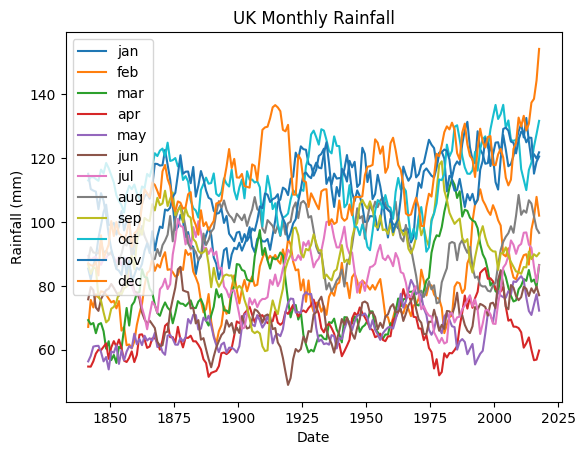

In [10]:
plot_data(rainfall_df, "Date", "Rainfall (mm)", "UK Monthly Rainfall", exclude_columns=["win", "spr", "sum", "aut", "ann"])

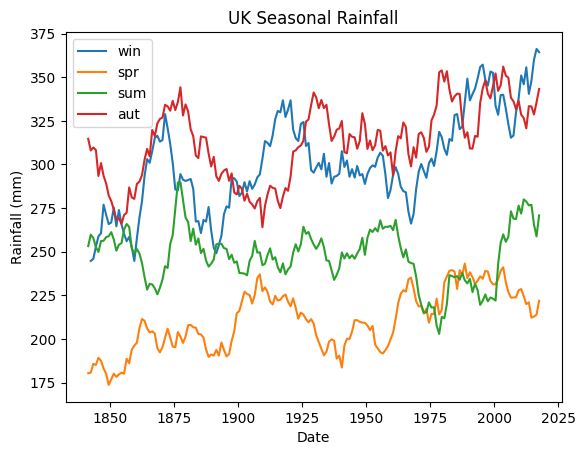

In [11]:
plot_data(rainfall_df, "Date", "Rainfall (mm)", "UK Seasonal Rainfall", exclude_columns=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec", "ann"])

<AxesSubplot:>

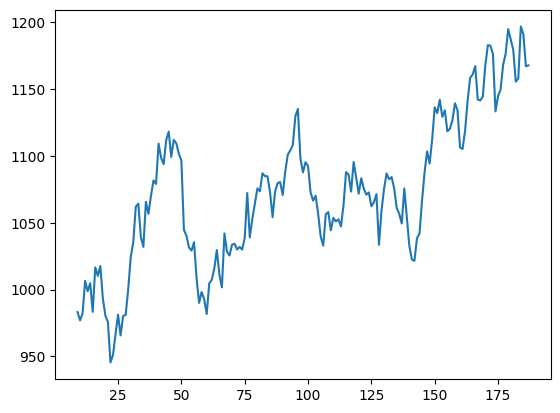

In [12]:
rainfall_df['ann'].rolling(10).mean().plot()

In [13]:
rainfall_months = convert_to_dataframe_months(rainfall_url, 'rainfall')
rainfall_months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2256 non-null   datetime64[ns]
 1   rainfall  2256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.4 KB


In [14]:
rainfall_months

,date,rainfall
0,1836-01-01,101.5
1,1836-02-01,69.8
2,1836-03-01,122.2
3,1836-04-01,75.1
4,1836-05-01,13.8
...,...,...
2251,2023-08-01,89.1
2252,2023-09-01,119.4
2253,2023-10-01,171.5
2254,2023-11-01,118.9


This will let us easily combine all datasets, by using the date as the index.

In [15]:
raindays_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Raindays1mm/date/UK.txt'

raindays_df = convert_to_dataframe(raindays_url)

raindays_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1891,13.6,3.5,13.2,8.8,15.3,8.9,15.3,21.5,15.5,18.7,15.3,18.7,NaN,37.2,45.8,49.6,168.4
1,1892,15.3,13.7,7.4,8.8,13.7,13.7,9.9,15.8,15.0,19.2,13.9,12.0,47.7,29.9,39.4,48.1,158.3
2,1893,14.5,18.2,7.1,5.0,9.7,8.4,15.3,14.3,14.1,16.9,13.7,17.3,44.6,21.8,38.0,44.7,154.4
3,1894,19.7,16.7,10.4,12.6,15.9,12.9,16.4,16.8,6.6,15.2,14.9,15.7,53.7,39.0,46.1,36.7,173.8
4,1895,17.4,4.3,16.5,11.5,5.5,9.1,16.2,18.0,7.0,16.8,17.5,16.4,37.4,33.5,43.3,41.3,156.2


In [16]:
raindays_months = convert_to_dataframe_months(raindays_url, 'raindays')
raindays_months

,date,raindays
0,1891-01-01,13.6
1,1891-02-01,3.5
2,1891-03-01,13.2
3,1891-04-01,8.8
4,1891-05-01,15.3
...,...,...
1591,2023-08-01,14.5
1592,2023-09-01,13.5
1593,2023-10-01,16.9
1594,2023-11-01,16.3


In [17]:
airfrost_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/AirFrost/date/UK.txt'

airfrost_df = convert_to_dataframe(airfrost_url)

airfrost_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1960,15.8,16.6,5.4,2.7,0.6,0.0,0.0,0.0,0.3,0.7,5.2,14.4,NaN,8.7,0.0,6.2,61.7
1,1961,14.5,3.8,4.2,2.5,1.2,0.1,0.0,0.0,0.0,0.7,7.6,19.7,32.7,7.9,0.2,8.3,54.3
2,1962,10.5,11.4,20.9,5.6,1.1,0.5,0.0,0.0,0.1,1.6,9.4,18.0,41.6,27.5,0.6,11.1,79.1
3,1963,27.4,26.1,8.7,3.3,0.8,0.0,0.0,0.0,0.1,0.3,5.1,15.0,71.6,12.8,0.0,5.5,86.9
4,1964,11.6,10.8,11.1,3.0,0.0,0.3,0.0,0.1,0.3,2.7,5.7,16.7,37.5,14.1,0.4,8.7,62.3


In [18]:
airfrost_months = convert_to_dataframe_months(airfrost_url, 'airfrost')
airfrost_months

,date,airfrost
0,1960-01-01,15.8
1,1960-02-01,16.6
2,1960-03-01,5.4
3,1960-04-01,2.7
4,1960-05-01,0.6
...,...,...
763,2023-08-01,0.0
764,2023-09-01,0.0
765,2023-10-01,1.1
766,2023-11-01,6.2


In [19]:
sunshine_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Sunshine/date/UK.txt'

sunshine_df = convert_to_dataframe(sunshine_url)

sunshine_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1910,50.9,72.2,130.3,122.8,190.5,177.5,148.6,128.8,120.5,74.5,67.0,29.9,NaN,443.7,454.9,262.0,1313.5
1,1911,46.1,60.4,102.0,126.2,208.1,205.1,250.4,201.1,163.2,86.2,56.6,36.7,136.4,436.3,656.5,306.0,1542.1
2,1912,33.5,53.5,89.7,195.6,153.8,129.7,133.3,80.5,110.8,91.6,33.5,19.4,123.8,439.1,343.5,235.9,1124.8
3,1913,29.3,52.0,100.9,115.5,161.2,170.9,133.0,144.1,105.2,88.1,58.4,32.0,100.7,377.6,447.9,251.6,1190.5
4,1914,28.6,59.1,93.7,202.3,157.4,207.3,145.5,172.8,158.7,73.0,51.0,36.6,119.7,453.4,525.6,282.7,1386.0


In [20]:
sunshine_months = convert_to_dataframe_months(sunshine_url, 'sunshine')
sunshine_months

,date,sunshine
0,1910-01-01,50.9
1,1910-02-01,72.2
2,1910-03-01,130.3
3,1910-04-01,122.8
4,1910-05-01,190.5
...,...,...
1363,2023-08-01,148.1
1364,2023-09-01,142.4
1365,2023-10-01,84.8
1366,2023-11-01,64.6


In [21]:
min_temperature_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmin/date/UK.txt'

min_temperature_df = convert_to_dataframe(min_temperature_url)

min_temperature_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1884,2.7,1.4,1.8,2.2,5.0,7.9,10.3,10.5,9.0,4.9,1.8,0.9,NaN,3.01,9.59,5.24,4.88
1,1885,-0.3,1.3,-0.1,2.5,3.5,7.8,9.5,8.1,6.8,3.1,2.3,0.3,0.61,1.97,8.48,4.03,3.74
2,1886,-1.5,-1.8,-0.1,2.2,4.7,7.5,9.8,10.0,8.1,6.9,3.0,-1.7,-0.96,2.24,9.10,5.99,3.94
3,1887,-0.7,0.2,-0.1,0.9,4.6,8.8,10.6,9.0,6.8,2.9,1.2,-0.7,-0.75,1.80,9.46,3.64,3.65
4,1888,0.2,-1.4,-0.9,1.7,4.6,7.3,8.7,8.8,7.0,3.8,4.2,1.6,-0.64,1.78,8.29,4.97,3.80


In [22]:
min_temperature_months = convert_to_dataframe_months(min_temperature_url, 'min_temperature')
min_temperature_months

,date,min_temperature
0,1884-01-01,2.7
1,1884-02-01,1.4
2,1884-03-01,1.8
3,1884-04-01,2.2
4,1884-05-01,5.0
...,...,...
1675,2023-08-01,11.4
1676,2023-09-01,11.0
1677,2023-10-01,7.6
1678,2023-11-01,3.4


In [23]:
max_temperature_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmax/date/UK.txt'

max_temperature_df = convert_to_dataframe(max_temperature_url)

max_temperature_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1884,7.3,6.8,8.5,10.1,14.5,17.1,18.8,20.2,17.0,11.8,7.5,5.8,NaN,11.02,18.73,12.10,12.14
1,1885,4.3,7.3,7.2,10.8,11.8,17.0,19.4,16.8,15.0,9.3,7.5,5.9,5.75,9.91,17.76,10.58,11.04
2,1886,3.7,3.4,6.1,10.5,13.1,16.4,18.7,18.5,16.0,12.9,8.6,4.1,4.36,9.88,17.87,12.51,11.04
3,1887,4.8,6.9,6.7,9.9,13.0,19.8,20.7,19.1,14.5,10.0,6.6,4.9,5.23,9.88,19.87,10.37,11.44
4,1888,5.5,3.7,5.2,9.0,14.1,16.3,16.0,16.9,15.4,11.4,8.9,7.1,4.74,9.41,16.38,11.91,10.81


In [24]:
max_temperature_months = convert_to_dataframe_months(max_temperature_url, 'max_temperature')
max_temperature_months

,date,max_temperature
0,1884-01-01,7.30
1,1884-02-01,6.80
2,1884-03-01,8.50
3,1884-04-01,10.10
4,1884-05-01,14.50
...,...,...
1675,2023-08-01,19.30
1676,2023-09-01,19.40
1677,2023-10-01,14.00
1678,2023-11-01,9.30


In [25]:
mean_temperature_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmean/date/UK.txt'

mean_temperature_df = convert_to_dataframe(mean_temperature_url)

mean_temperature_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1884,5.0,4.2,5.1,6.2,9.7,12.5,14.5,15.3,13.0,8.3,4.6,3.3,NaN,6.98,14.11,8.62,8.48
1,1885,2.0,4.2,3.5,6.6,7.6,12.3,14.5,12.4,10.9,6.2,4.8,3.0,3.14,5.92,13.09,7.28,7.36
2,1886,1.1,0.8,2.9,6.3,8.8,11.9,14.2,14.1,12.0,9.9,5.7,1.2,1.68,6.01,13.42,9.20,7.45
3,1887,2.1,3.5,3.3,5.4,8.7,14.3,15.6,14.0,10.6,6.4,3.9,2.1,2.23,5.80,14.61,6.97,7.51
4,1888,2.8,1.1,2.1,5.3,9.2,11.8,12.3,12.8,11.2,7.6,6.5,4.3,2.03,5.56,12.31,8.43,7.28


In [26]:
mean_temperature_months = convert_to_dataframe_months(mean_temperature_url, 'mean_temperature')
mean_temperature_months

,date,mean_temperature
0,1884-01-01,5.00
1,1884-02-01,4.20
2,1884-03-01,5.10
3,1884-04-01,6.20
4,1884-05-01,9.70
...,...,...
1675,2023-08-01,15.30
1676,2023-09-01,15.20
1677,2023-10-01,10.80
1678,2023-11-01,6.30


In [27]:
# Combine all the monthly dataframes into one
monthly_data = rainfall_months.merge(raindays_months, on='date')
monthly_data = monthly_data.merge(airfrost_months, on='date')
monthly_data = monthly_data.merge(sunshine_months, on='date')
monthly_data = monthly_data.merge(min_temperature_months, on='date')
monthly_data = monthly_data.merge(max_temperature_months, on='date')
monthly_data = monthly_data.merge(mean_temperature_months, on='date')

monthly_data.head()

,date,rainfall,raindays,airfrost,sunshine,min_temperature,max_temperature,mean_temperature
0,1960-01-01,123.4,16.1,15.8,36.9,0.4,5.8,3.1
1,1960-02-01,98.1,14.9,16.6,81.7,-0.5,5.8,2.6
2,1960-03-01,50.4,10.0,5.4,74.3,2.4,8.1,5.3
3,1960-04-01,72.2,10.3,2.7,148.0,3.8,12.1,8.0
4,1960-05-01,48.4,6.7,0.6,182.4,6.8,16.2,11.4


C:\Users\omarc\AppData\Local\Temp\ipykernel_41340\4191765564.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = monthly_data.corr()


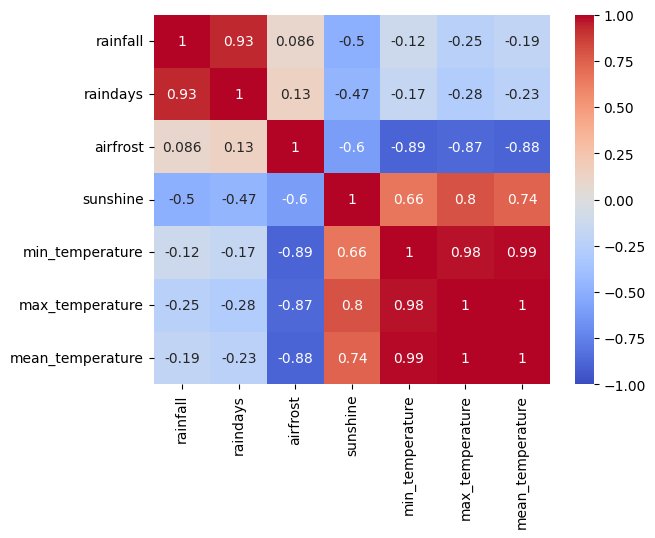

In [28]:
# Plot a correlation matrix
corr = monthly_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

C:\Users\omarc\AppData\Local\Temp\ipykernel_41340\41157546.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  rolling_data = monthly_data.rolling(12).mean()


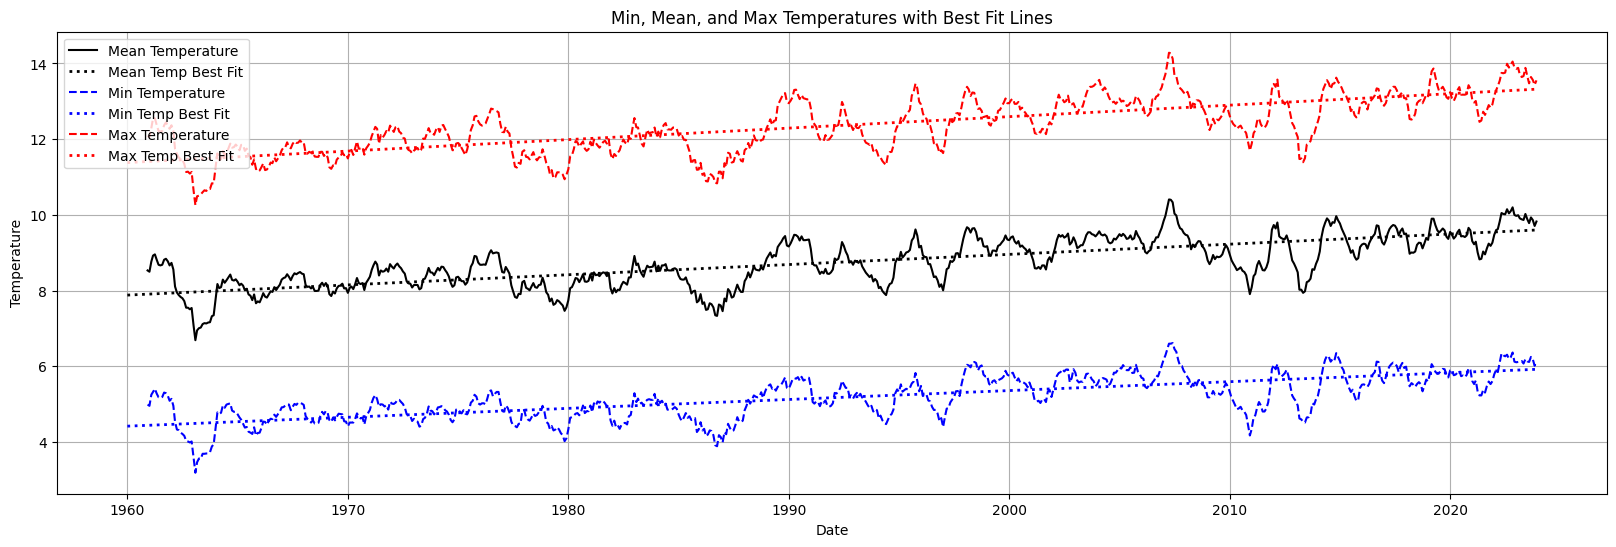

In [29]:
# Convert 'date' to datetime if it's not already
monthly_data['date'] = pd.to_datetime(monthly_data['date'])

rolling_data = monthly_data.rolling(12).mean()

# Calculate the linear regression (line of best fit) coefficients
def best_fit_line(data, x, y):
    coeffs = np.polyfit(data[x].astype(float), data[y], 1)
    return np.poly1d(coeffs)

# Convert dates to numbers for regression calculation
monthly_data['date_num'] = monthly_data['date'].map(pd.Timestamp.toordinal)

# Create the best fit lines
mean_fit_line = best_fit_line(monthly_data, 'date_num', 'mean_temperature')
min_fit_line = best_fit_line(monthly_data, 'date_num', 'min_temperature')
max_fit_line = best_fit_line(monthly_data, 'date_num', 'max_temperature')

# Create the plot
plt.figure(figsize=(20, 6))

# Plot mean temperature and its best fit line
plt.plot(monthly_data['date'], rolling_data['mean_temperature'], label='Mean Temperature', color='black')
plt.plot(monthly_data['date'], mean_fit_line(monthly_data['date_num']), color='black', linestyle=':', linewidth=2, label='Mean Temp Best Fit')

# Plot min temperature and its best fit line
plt.plot(monthly_data['date'], rolling_data['min_temperature'], label='Min Temperature', color='blue', linestyle='--')
plt.plot(monthly_data['date'], min_fit_line(monthly_data['date_num']), color='blue', linestyle=':', linewidth=2, label='Min Temp Best Fit')

# Plot max temperature and its best fit line
plt.plot(monthly_data['date'], rolling_data['max_temperature'], label='Max Temperature', color='red', linestyle='--')
plt.plot(monthly_data['date'], max_fit_line(monthly_data['date_num']), color='red', linestyle=':', linewidth=2, label='Max Temp Best Fit')

# Add legend and labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Min, Mean, and Max Temperatures with Best Fit Lines')
plt.grid(True)
plt.show()


In [30]:
monthly_data.isnull().sum()

date                0
rainfall            0
raindays            0
airfrost            0
sunshine            0
min_temperature     0
max_temperature     0
mean_temperature    0
date_num            0
dtype: int64

### Objective 1: Assessing the Impact of Meteorological Factors on Ground-Level Ozone Concentration

The main aim is to evaluate the associations between ground-level ozone concentration and key **meteorological** factors, including annual temperature, airfrost, sunshine, and rainfall, to understand their impact on ozone formation and levels. 

Since the meteorogical data was based on the UK, the data about the Ozone concentration was derived from the gov.uk website [Annual mean concentrations of O3 in the UK, 1987 to 2022](https://assets.publishing.service.gov.uk/media/6446414522ef3b000c66f764/Table13.csv) as a CSV file and it was read as a pandas dataframe using read.csv method. The dataset was investigated using the info and display method.

To achieve the objective of checking whether the mean concentration of O3 might be correlated to the mean temperature in the UK, the dataset of teh annual mean concentration of Ozone is read using the read_csv methods from Pandas library. 

#### STEP 1: reading the dataframe from the csv file

In [31]:
# annual_mean_concentration_o3
url = 'https://assets.publishing.service.gov.uk/media/6446414522ef3b000c66f764/Table13.csv'
df_o3 = pd.read_csv('https://assets.publishing.service.gov.uk/media/6446414522ef3b000c66f764/Table13.csv')
print(df_o3.shape)
print(list(df_o3.columns))

(36, 7)
['year', 'Rural_Background', 'Urban_Background', 'RB_CI', 'UB_CI', 'RB_n', 'UB_n']


In [32]:
df_o3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              36 non-null     int64  
 1   Rural_Background  36 non-null     float64
 2   Urban_Background  31 non-null     float64
 3   RB_CI             36 non-null     float64
 4   UB_CI             31 non-null     float64
 5   RB_n              36 non-null     int64  
 6   UB_n              31 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 2.1 KB


In [33]:
display(df_o3)

,year,Rural_Background,Urban_Background,RB_CI,UB_CI,RB_n,UB_n
0,1987,55.733720,NaN,6.721002,NaN,5,NaN
1,1988,65.649813,NaN,4.659027,NaN,12,NaN
2,1989,67.864646,NaN,4.972931,NaN,14,NaN
3,1990,69.718848,NaN,4.508191,NaN,15,NaN
4,1991,66.794271,NaN,4.455004,NaN,12,NaN
5,1992,67.864186,39.920732,5.035280,12.525720,14,4.0
6,1993,65.215029,40.177077,5.309472,4.829715,14,8.0
7,1994,69.383870,47.429640,3.869374,3.260084,14,13.0
8,1995,70.041854,50.599691,3.851554,4.459545,15,12.0
9,1996,66.705514,45.922460,3.360383,2.793073,15,18.0


**The output from the above cell shows the dataframe, detailing the annual background concentration of ozone in the UK, both rural and urban area, from 1987 to 2006.**

It includes years, average annual ozone concentrations in rural (Rural_Background) and urban (Urban_Background) areas in micrograms per cubic meter, with missing values in some years. The columns RB_CI and UB_CI represent confidence intervals for rural and urban ozone concentrations, indicating uncertainty or variability in these measurements. The RB_n and UB_n columns denote the number of monitoring sites for rural and urban data, respectively. 

The shape method concluded that the dataset has 7 columns and 36 rows. The columns method showed the title of the columns as follows: 'year', 'Rural_Background', 'Urban_Background', 'RB_CI', 'UB_CI', 'RB_n', 'UB_n'. The dataset the year the measurement was taken on ranging from 1987 to 2006, the measurement of the background concentration of Ozone in rural and urban areas in the UK, the confidence interval for the measurements and the number of monitoring sites where the background Ozone conecentrations were measured in order to calculate the mean concentration for both the rural and urban areas. 

The info method brought us insights about the missing data in the urban background column. Since the number of rows is small the dataset was investigated using the display method. it was noted that the data range between x year to year.

Overall, the data suggests an increasing trend in ozone concentration over these years in both settings, with some fluctuations and varying data completeness.

#### STEP 2: Merging the two datasets on the column 'year'

In order to make the assessment between the two datasets: one containing Ozone data (df_o3) and another has the mean temperature data (mean_temperature_df). The two datasets were merged using the merge method from Pandas library. Since the the MetOffice dataset covers the period between 1884 and 2023 and the GOV.UK dataset covers a shorter period, the merge was essential to ensure that the data are matched. 

The merge was performed by combining the relevant columns from the two datasets i.e year, rural background and urban background from the GOV.UK dataset and year, ann from the MetOffice dataset. It was done on the year column with an inner join to ensure that only data with matching year values are avaialble in the merged dataframe. 

The missing data in the 'Urban_Background' column  were filtered using the notna method to ensure that we work with complete data. 

In [34]:
# merge df_o3 and mean_temperature_df
df_merged = pd.merge(df_o3[['year', 'Rural_Background', 'Urban_Background']], 
                     mean_temperature_df[['year', 'ann']], 
                     how='inner', left_on='year', right_on='year'
                     )
print(df_merged.shape)
print(list(df_merged.columns))

(36, 4)
['year', 'Rural_Background', 'Urban_Background', 'ann']


In [35]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              36 non-null     int64  
 1   Rural_Background  36 non-null     float64
 2   Urban_Background  31 non-null     float64
 3   ann               36 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.4 KB


In [36]:
# filter out nan values
df_merged_filtered = df_merged[df_merged['Urban_Background'].notna()].reset_index()
display(df_merged_filtered)

,index,year,Rural_Background,Urban_Background,ann
0,5,1992,67.864186,39.920732,8.69
1,6,1993,65.215029,40.177077,8.33
2,7,1994,69.383870,47.429640,8.89
3,8,1995,70.041854,50.599691,9.17
4,9,1996,66.705514,45.922460,8.18
5,10,1997,65.878042,45.256292,9.41
6,11,1998,68.051005,48.456825,9.16
7,12,1999,72.206833,55.613054,9.37
8,13,2000,67.168577,52.186089,9.10
9,14,2001,66.141094,51.536867,8.80


The output above depicts a dataframe of 4 columns, namely 'year', 'Rural_Background', 'Urban_Background', 'ann' and 31 rows which implies 31 years of matched data. 

#### STEP 3: assessing the changes in the background concentration in rural and urban areas 

To understand the trend of the average annual concentration of Ozone in rural and urban areas, the data were plotted to calculate and visualise the trend of Ozone concentrations in both rural and urban areas. 

The correlation between the rural and urban background concentration of Ozone was plotted using a scatter plot. The correlation was estimated using a linear regression model which takes the form of y = m*x + c. The ‘polyfit’ function from numpy library was used to calculate the m and c constants. The poly1d function was used to generate the line function of the linear regression.  The best fit line was, then, plotted to the figure using the line function ‘p(value of x that need the y calculated for)’ To assess the goodness of the fit, the R squared value was calculated using the stats module from the scipy library. The stats.linregress function was used to estimate the slope (m), intercept(c), R value, P value, and standard error of the linear regression model. The R squared value was shown on the plot using the text function.

To examine the yearly change in Ozone background concentration over the investigated period, a bar plot was employed. The bar value was calculated using the diff method which calculate the difference of a DataFrame element compared with the element in the previous row. It is expected that Ozone background concentrations are higher in rural areas compared with the urban areas. 

A dictionary 'info' was created to ensure consistency in plotting and labeling in the following figures. The dictionary includes values for key plotting attributes for both rural and urban backgrounds. 

In [37]:
# define info in a dictionary to ensure consistency
info = {'Rural_Background': {'key_color':'r',
                             'sec_color':'g',
                             'marker': 'o',
                             'linestyle': '--',
                             'label': 'Rural Background' 
                            },
        'Urban_Background': {'key_color':'b',
                             'sec_color':'k',
                             'marker': 's',
                             'linestyle': '--',
                             'label': 'Urban Background' 
                            }
         }

0.489392529773384


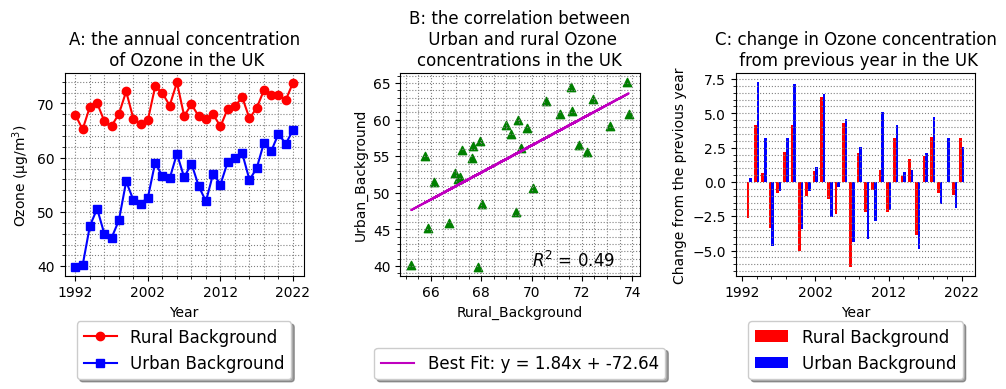

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
########################################
# plotting df_merged by year and Rural_Background/Urban_Background
for x in ['Rural_Background', 'Urban_Background']:
    
    ax[0].plot(df_merged_filtered['year'], df_merged_filtered[x], 
               marker = info[x]['marker'], c = info[x]['key_color'], label= info[x]['label'])
    
# set x ticks 
ax[0].set_xticks(np.arange(df_merged_filtered['year'].min(), df_merged_filtered['year'].max()+1, 10))

# add legend
legend = ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), shadow=True, fontsize='large')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Ozone (µg/m$^3$)')
ax[0].set_title('A: the annual concentration\n of Ozone in the UK')
ax[0].grid(which = 'both', c = 'grey', ls = ':')
ax[0].minorticks_on()

########################################
# plot a scatter plot of df_merged_filtered by Urban_Background and Rural_Background
ax[1].scatter(df_merged_filtered['Rural_Background'], df_merged_filtered['Urban_Background'], marker = '^', c = 'g')

#add labels
ax[1].set_xlabel('Rural_Background')
ax[1].set_ylabel('Urban_Background')
ax[1].set_title('B: the correlation between\n Urban and rural Ozone\nconcentrations in the UK')
ax[1].grid(which = 'both', c = 'grey', ls = ':')
ax[1].minorticks_on()

# draw the best fit line

z = np.polyfit(df_merged_filtered['Rural_Background'], df_merged_filtered['Urban_Background'], 1)
p = np.poly1d(z)
ax[1].plot(df_merged_filtered['Rural_Background'],p(df_merged_filtered['Rural_Background']),
           "m-", label='Best Fit:'+f' y = {z[0]:.2f}x + {z[1]:.2f}')

# plot R^2 in scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(df_merged_filtered['Rural_Background'], df_merged_filtered['Urban_Background'])
print(r_value**2)
ax[1].text(70, 40, f'$R^2$ = {r_value**2:.2f}', fontsize=12)

# add legend
legend = ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), shadow=True, fontsize='large')
####################################
bar_width = 0.35
# plotting the change per year in rural and urban background concentration of Ozone
for z in ['Rural_Background', 'Urban_Background']:
    
    ax[2].bar(df_merged_filtered['year'] - bar_width/2, df_merged_filtered[z].diff(), 
              label = info[z]['label'], color = info[z]['key_color'], width = abs(bar_width))
    bar_width = - bar_width

# set x ticks 
ax[2].set_xticks(np.arange(df_merged_filtered['year'].min(), df_merged_filtered['year'].max()+1, 10))
    
# add legend
legend = ax[2].legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), shadow=True, fontsize='large')

# add labels 
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Change from the previous year')
ax[2].set_title('C: change in Ozone concentration\n from previous year in the UK')
ax[2].grid(which = 'both', axis = 'y', c = 'grey', ls = ':')
ax[2].minorticks_on()
############################################
plt.tight_layout(h_pad=None, w_pad=None)
plt.show()

In [39]:
print(df_merged_filtered)

    index  year  Rural_Background  Urban_Background    ann
0       5  1992         67.864186         39.920732   8.69
1       6  1993         65.215029         40.177077   8.33
2       7  1994         69.383870         47.429640   8.89
3       8  1995         70.041854         50.599691   9.17
4       9  1996         66.705514         45.922460   8.18
5      10  1997         65.878042         45.256292   9.41
6      11  1998         68.051005         48.456825   9.16
7      12  1999         72.206833         55.613054   9.37
8      13  2000         67.168577         52.186089   9.10
9      14  2001         66.141094         51.536867   8.80
10     15  2002         66.954931         52.659081   9.44
11     16  2003         73.120972         59.103133   9.47
12     17  2004         71.905542         56.548156   9.44
13     18  2005         69.588804         56.163646   9.42
14     19  2006         73.861210         60.726035   9.70
15     20  2007         67.686823         56.361955   9.

The figure consists of three graphs showing different represeantations of the ozone concentration in the UK.

* Figure A shows the evolution of the annual concentration of Ozone in the UK between 1992 and 2020 with red representing rural background ozone levels and blue for urban background. Both datasets show an overall increasing trend in ozone concentration over time, with the rural levels being consistently higher.

* Figure B shows the correlation between Urban and rural Ozone concentrations in the UK. The plot correlates rural background ozone levels (x-axis) with urban background levels (y-axis). The best fit line of the linear regression model indicates a positive relationship with an R squared value of 0.49, suggesting a moderate correlation between rural and urban ozone levels.

* Figure C shows the change in Ozone concentration from previous year in the UK. The graph depicts no particular trand and flactuation over the years. Overall, there was a consistency in the fluctuation trend between the rural and urban Ozzone concentrations.  

#### STEP 4: assessing the correlation between rural and urban background concentration of Ozone and meteorological factors

The correlation was assessed using the merged dataframe by drawing a scatter plot where the x axis is one of the meteorological factors e.g, the average annunal temperature in celsius (°C) and the y axis is the average annual background concentration of Ozone (µg/m$^3$). Using the matplotlib.pyplot.scatter method, the parameters were passed as follows: x axis as the column 'ann' and the y axis as the column 'Rural_Background' and other parameters were also selected to improve the presentation, the viualisation and the readability of the scatter plot.

Assuming the correlarion is defined by a linear regression, the best fit line was drawn using polyfit from numpy which takes the x and y coordinates and the degree of the fitting polynomial which was selected as 1. The linear model has the equation of the form ($y = m\times x + c$). The numpy polyfit function returns an array of the values of the constants m and c. The poly1d function returns the equation using the values of the constants that were found in the numpy polyfit function. To plot the best fit line, the plot fucntion was used where x is the meteorological factor and y is the estimated background concentration of Ozone which is derived from the function of the equation (p).

The best fit line was also calculated using stats.linregress in which from the libraray scipy, the library stats was imported. The slope, intercept, r_value, p_value and std_err were calculated using stats.linregress. 

The confidence interval of the best fit line is calculated to assess the precision of the estimated relationship between the Average annual concentration of Ozone and the meteorological factors. It provides a range within which the true slope of the population regression line is expected to lie with a certain level of confidence. This interval accounts for the variability in the data and gives insight into the statistical significance and reliability of the estimated slope.

The confidence interval (CI) of a linear slope regression can be calculated using the following equation: 

\begin{align}
CI = m \pm t^{*} \times SE(m)
\end{align}

Where: 

- $m$ is the slope coefficient 
- $t*$ is the t critical value for confidence level
- $SE(m)$ is the standard error of $m$ 
- The 95% confidence interval area was drawn using regplot function from `seaborn` library. 

Rural Background best fit equation:   
4.473 x + 27.81
Urban Background best fit equation:   
8.745 x - 25.35


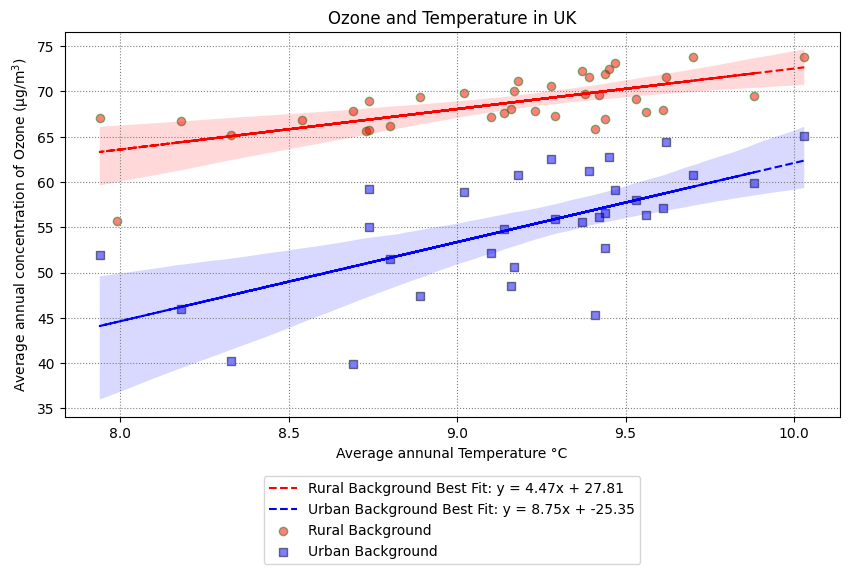

In [40]:
def assess_correlation_Ozone_and_meteorological_factor ():
    # create a figure to hold the plot
    fig , ax = plt.subplots(figsize=(10, 5))
    
    for x in info.keys():
        # remove NaN values
        df_filtered = df_merged[df_merged[x].notna()]
        ##########################################################################################
        # plot a scatter plot of df_merged by year and Rural_Background
        ax.scatter(df_filtered[df_filtered[x]!=np.nan]['ann'], df_filtered[x], 
                   c = info[x]['key_color'], 
                   edgecolors = info[x]['sec_color'], 
                   marker = info[x]['marker'], 
                   label = info[x]['label'], 
                   alpha = 0.5)
        
        ##########################################################################################
        # add best fit line for Rural_Background
        # The assumption of a linear fit, which follows the form: y = m+xc 
        # finding the constants
        z = np.polyfit(df_filtered['ann'], df_filtered[x], 1) 
        # writing the equation
        p = np.poly1d(z)  
        print (info[x]['label']+' best fit equation: ', p)
        # plot the line
        ax.plot(df_filtered['ann'],p(df_filtered['ann']),
                color = info[x]['key_color'],
                linestyle = info[x]['linestyle'],
                label = info[x]['label']+' Best Fit: ' + f'y = {z[0]:.2f}x + {z[1]:.2f}')

        #plot the equation of the line
        #print(z)
        #ax.text(10, 50, f'y = {z[0]:.2f}x + {z[1]:.2f}', fontsize=12)
        ##########################################################################################
        # plot 95% confidence interval for Rural_Background as an area
        ci = 95
        sns.regplot(ax = ax, # 
                    # y = x where x is from the for loop
                    x = 'ann', y = x, data = df_filtered, 
                    order = 1, # linear regression
                    fit_reg = True, ci = ci,
                    color = info[x]['key_color'],
                    scatter = False, # we can remove the scatter plot above if this is True
                    line_kws = {'linestyle':''}, # we can remove the best fit plot above if this is not ''
                   )

    ##########################################################################################
    # plot legends 
    ax.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.4))
    # create lables
    ax.set_xlabel('Average annunal Temperature °C')
    ax.set_ylabel('Average annual concentration of Ozone (µg/m$^3$)')
    ax.set_title('Ozone and Temperature in UK')
    ##NOTE: add R value to the plot
    # add grid dotted lines and light grey color
    ax.grid(c = 'grey', ls = ':')

    tight_layout = True
    plt.show()
    
assess_correlation_Ozone_and_meteorological_factor()

Ths above figure shows a scatter plot of the relationship between one of the meteorological factors whihc is the average annual temperature and the average annual concentration of ozone in micrograms per cubic meter (µg/m³) in the UK. 

The red circles represents the average annual concentration of ozone in rural areas of the UK plotted against the average annual temperature. The red line shows the best fit line of the form $y=4.47x+27.81$, where where 'y' is the average annual concentration of ozone and 'x' is the average annual temperature. It is a linear regression indicating the trend in the data. The confidence interval is shown as a shaded area around the line to represent the uncertainty around the best fit line.

The blue squares represents the average annual concentration of ozone in urban areas of the UK plotted against the average annual temperature. The blue line represents the best fit line of the form $y=8.75x+25.35$. 

A positive correlation between temperature and ozone concentration in both rural and urban areas. In other words, the temperature with the increase of the concentration of ozone. The steeper slope in the urban area reflects a stronger correlation compared to the rural areas, which indicates that the temperature might have a remarkable impact on the concentration of Ozone in in urban areas. The wider confidence interval of the concentration of Ozone in the rural areas suggests more uncertainty and variability in the trends and the measurements. 

### Objective 2: Atmospheric CO<sub>2</sub> Levels

In the next section we load a text file containing monthly atmospheric CO<sub>2</sub> measurements. It's a bit complicated because there is a large section commented out by "#"s at the beginning, so we need to read it in as text, strip these lines out, and then construct a PANDAS dataframe from the rest, converting it to float values as we go.

In [41]:
#This data is from the Mauna Loa observatory (apart from a few months when it was erupting, and Mauna Kea values were used)
co2_link = "https://github.com/omariosc/comp5712-p4ds-group-project/blob/main/co2_mm_mlo.txt?raw=true"

# The URL is adjusted to point directly to the raw file
r_co2_link = requests.get(co2_link)

with open('co2_mm_mlo.txt', 'wb') as f:
    f.write(r_co2_link.content)

co2_file = open("co2_mm_mlo.txt","r")
all_lines = co2_file.readlines()
data_lines = [line.split() for line in all_lines if line[0]!= '#']
col_names = ["Year","Month", "Decimal Date","CO2 ppm","CO2 deseasonalised","days","days_SD","uncertainty"]
co2_df = pd.DataFrame(data_lines,columns = col_names, dtype = "float64")
co2_file.close()

display(co2_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                788 non-null    float64
 1   Month               788 non-null    float64
 2   Decimal Date        788 non-null    float64
 3   CO2 ppm             788 non-null    float64
 4   CO2 deseasonalised  788 non-null    float64
 5   days                788 non-null    float64
 6   days_SD             788 non-null    float64
 7   uncertainty         788 non-null    float64
dtypes: float64(8)
memory usage: 49.4 KB


None

<AxesSubplot:>

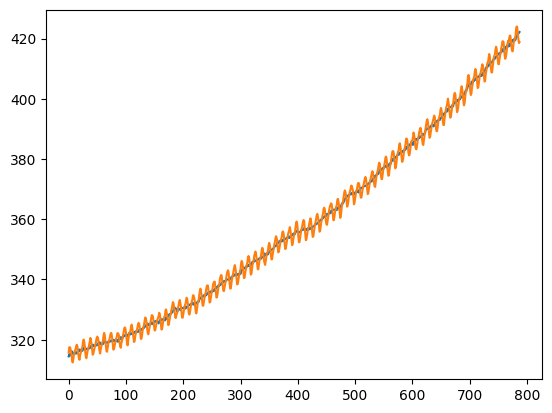

In [42]:
co2_df["CO2 deseasonalised"].plot()
co2_df["CO2 ppm"].rolling(1).mean().plot()

In [43]:
ice_core_co2 = pd.read_csv("https://github.com/omariosc/comp5712-p4ds-group-project/blob/main/smoothedco2_1000y.csv?raw=true")
display(ice_core_co2.head())

,Year,CO2_PPM
0,1000,278.66
1,1001,278.68
2,1002,278.69
3,1003,278.71
4,1004,278.72


<AxesSubplot:xlabel='Year', ylabel='CO2_PPM'>

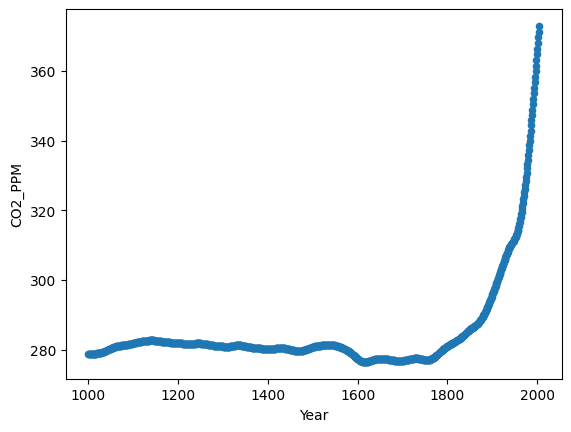

In [44]:
ice_core_co2.plot.scatter("Year","CO2_PPM")

In [45]:
co2_df.set_index(co2_df["Year"])
co2_data = pd.concat([co2_df,ice_core_co2],axis=1)
co2_data

,Year,Month,Decimal Date,CO2 ppm,CO2 deseasonalised,days,days_SD,uncertainty,Year,CO2_PPM
0,1958.0,3.0,1958.2027,315.70,314.43,-1.0,-9.99,-0.99,1000,278.66
1,1958.0,4.0,1958.2877,317.45,315.16,-1.0,-9.99,-0.99,1001,278.68
2,1958.0,5.0,1958.3699,317.51,314.71,-1.0,-9.99,-0.99,1002,278.69
3,1958.0,6.0,1958.4548,317.24,315.14,-1.0,-9.99,-0.99,1003,278.71
4,1958.0,7.0,1958.5370,315.86,315.18,-1.0,-9.99,-0.99,1004,278.72
...,...,...,...,...,...,...,...,...,...,...
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,366.40
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,368.03
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002,369.66
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,371.30


#### Local Weather: Yorkshire and Humber

To look at weather intensity, and whether that has increased over the last 100 years or so, we need a more detailed dataset, in terms of both time resolution and locale. In this case, we've focussed on the local area, and obtained data (from the Met Office, but from the CEDA repository), for daily rainfall and maximum temperature. This will allow us to investigate whether rainfall intensity (length of rainfall periods, and amount of rainfall during them) has increased, and also whether the incidence of heatwaves has increased.

The data in this section comes from the CEDA archive (the data can be found here:
https://dap.ceda.ac.uk/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.2.0.ceda/region/), and is mostly in the form of .nc files: to get these into a PANDAS dataframe we have used xarray, which itself uses netCDF4.

It requires a (free) account to access it, so the files have been downloaded, and read from local disk.

It's a little complicated to filter, because it has a multi-level index, so we filter using .xs() to select the data we want (that corresponding to the region which in a given dataset is Yorkshire and Humber), and the 0th band (it looks like band 1 is identical).

#### Local Monthly Rainfall

To compare Yorkshire's mean temperature data with the data above for the UK at the monthly level, here is a monthly dataset

In [46]:
# .nc file but we use .txt as permission errors
temp_monthly_link = "https://github.com/omariosc/comp5712-p4ds-group-project/blob/main/tas_hadukgrid_uk_region_mon_188401-202112.txt?raw=true"

# The URL is adjusted to point directly to the raw file
r_temp_monthly_link = requests.get(temp_monthly_link)

# This notebook updates the GitHub, so we .use txt 
with open('tas_hadukgrid_uk_region_mon_188401-202112.txt', 'wb') as f:
    f.write(r_temp_monthly_link.content)

temp_monthly = xr.open_dataset("tas_hadukgrid_uk_region_mon_188401-202112.txt")
df_temp_m = temp_monthly.to_dataframe()
df_yorks_temp = df_temp_m.xs(12, level = "region").xs(0,level = "bnds")
display(df_yorks_temp)

,tas,time_bnds,geo_region,calendar_year,month_number,season_year
time,,,,,,
1884-01-16,4.864830,1884-01-01,b'Yorkshire and Humber ',1884,1,1884
1884-02-16,3.981511,1884-02-01,b'Yorkshire and Humber ',1884,2,1884
1884-03-16,4.986235,1884-03-01,b'Yorkshire and Humber ',1884,3,1884
1884-04-16,6.029561,1884-04-01,b'Yorkshire and Humber ',1884,4,1884
1884-05-16,9.795306,1884-05-01,b'Yorkshire and Humber ',1884,5,1884
...,...,...,...,...,...,...
2021-08-16,15.476466,2021-08-01,b'Yorkshire and Humber ',2021,8,2021
2021-09-16,15.320417,2021-09-01,b'Yorkshire and Humber ',2021,9,2021
2021-10-16,11.127126,2021-10-01,b'Yorkshire and Humber ',2021,10,2021


It is clear from this graph that the rising trend seen nationally is also seen in Yorkshire, though there is a lot of variation in the first half of the century, even when using a 10-year rolling average.

#### Yorkshore Daily Rainfall Data

This dataset provides rainfall data at the daily level, by UK region. The data can be found here:
https://dap.ceda.ac.uk/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.2.0.ceda/region/rainfall/day/v20230328/rainfall_hadukgrid_uk_region_day_18910101-20221231.nc?download=1

We can use this data to look at the length of rainfall periods, and the amount of rain that falls during them.

In [47]:
# .nc file but we use .txt as permission errors
rainfall_daily_link = "https://github.com/omariosc/comp5712-p4ds-group-project/blob/main/rainfall_hadukgrid_uk_region_day_18910101-20221231.txt?raw=true"

# The URL is adjusted to point directly to the raw file
r_rainfall_daily_link = requests.get(rainfall_daily_link)
with open('rainfall_hadukgrid_uk_region_day_18910101-20221231.txt', 'wb') as f:
    f.write(r_rainfall_daily_link.content)

# Now, read the NetCDF file using xarray
rainfall_daily = xr.open_dataset('rainfall_hadukgrid_uk_region_day_18910101-20221231.txt')

In [48]:
df_rfd = rainfall_daily.to_dataframe()
df_yorks = df_rfd.xs(16, level = "region").xs(0,level = "bnds") #["rainfall","geo_region"]

display(df_yorks.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48212 entries, 1891-01-01 12:00:00 to 2022-12-31 12:00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rainfall    48212 non-null  float64       
 1   time_bnds   48212 non-null  datetime64[ns]
 2   geo_region  48212 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ MB


None

Now we want to see if we can label each row  with its year, month and day, so we can iterate over them

In [49]:
df_yorks["year"] = df_yorks["time_bnds"].dt.year
df_yorks["month"] = df_yorks["time_bnds"].dt.month
df_yorks["day"] = df_yorks["time_bnds"].dt.day
display(df_yorks.head())

,rainfall,time_bnds,geo_region,year,month,day
time,,,,,,
1891-01-01 12:00:00,0.00204,1891-01-01 09:00:00,b'Yorkshire and Humber',1891,1,1
1891-01-02 12:00:00,0.49175,1891-01-02 09:00:00,b'Yorkshire and Humber',1891,1,2
1891-01-03 12:00:00,2.01729,1891-01-03 09:00:00,b'Yorkshire and Humber',1891,1,3
1891-01-04 12:00:00,1.92267,1891-01-04 09:00:00,b'Yorkshire and Humber',1891,1,4
1891-01-05 12:00:00,1.08062,1891-01-05 09:00:00,b'Yorkshire and Humber',1891,1,5


#### Yorkshire Rainfall Intensity

Now we will calculate, for each year, the average number of days a rainy period lasts, and the average rainfall during it. For each spell, we'll calculate the rainfall during it, divided by the duration, to get an intensity measurement (i.e. average rainfall per day). We'll set a minimum rainfall of 1 mm for it to count as a rainy day (it IS Yorkshire, after all...)

In [50]:
min_rf = 1
list_of_years = []
for yr in range(1891,2023):
    rfl = []
    rfs = []
    rfi = []
    yr_frame = df_yorks[df_yorks["year"] == yr]["rainfall"]
    rf_length = 0
    rf_sum = 0
    for rf in yr_frame:
        if rf >= min_rf:
            rf_length += 1
            rf_sum += rf
        else:
            #This rainfall episode has ended: store data and reset accumulator variables
            if rf_length > 0:
                rfl.append(rf_length)
                rfs.append(rf_sum)
                rfi.append(rf_sum/rf_length)
            rf_length =0
            rf_sum =0
    list_of_years.append((yr,len(rfl),np.mean(rfl),np.sum(rfl),np.mean(rfs),np.sum(rfs),np.mean(rfi)))
            
        
#print(list_of_years)
col_names = ["Year", "No. rainy episodes","Mean duration","Total No days","Mean volume","Total volume","Mean daily rainfall"]
drf_df = pd.DataFrame(list_of_years,columns = col_names)
drf_df.set_index("Year",inplace=True,drop = False)
#display(drf_df)

In [51]:
drf_df.describe()

,Year,No. rainy episodes,Mean duration,Total No days,Mean volume,Total volume,Mean daily rainfall
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,1956.500000,57.704545,2.860699,164.363636,13.697312,787.233609,4.325328
std,38.249183,4.812101,0.298150,15.481224,1.982964,109.823781,0.378006
min,1891.000000,45.000000,2.180328,124.000000,9.844955,545.542430,3.494542
25%,1923.750000,54.000000,2.669165,154.750000,12.449210,714.409627,4.091107
50%,1956.500000,58.000000,2.859563,165.500000,13.361918,789.911000,4.257696
75%,1989.250000,61.000000,3.034615,175.250000,14.973338,868.312267,4.525436
max,2022.000000,68.000000,3.744681,198.000000,19.788665,1074.675060,5.587432


It seems that there is a clear trend towards more intense rainfall, but no obvious increase in the number or duration of the episodes. This is consistent with the hypothesis that weather events will become more intense (but not necessarily more frequent) as a consequence of global warming.

#### Heatwaves

The Met Office defines a heat wave as three or more days when the maximum daily temperature exceeds the local threshold (https://www.metoffice.gov.uk/weather/learn-about/weather/types-of-weather/temperature/heatwave).

For Yorkshire and Humber, this threshold is 25 or 26 degrees Celsius, depending on which bit you are in! We'll take 26.

Here is some data on the maximum temperature each day for UK regions, downloaded from this source:
https://dap.ceda.ac.uk/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.2.0.ceda/region/tasmax/day/v20230328/tasmax_hadukgrid_uk_region_day_19600101-20221231.nc

We then extract the data for Yorkshire and Humber.

Note that this data is only available from 1960!

In [52]:
# .nc file but we use .txt as permission errors
temp_max_daily_link = "https://github.com/omariosc/comp5712-p4ds-group-project/blob/main/tasmax_hadukgrid_uk_region_day_19600101-20211231.txt?raw=true"

# The URL is adjusted to point directly to the raw file
r_temp_max_daily_link = requests.get(temp_max_daily_link)

# Again, using .txt as permission errors
with open('tasmax_hadukgrid_uk_region_day_19600101-20211231.txt', 'wb') as f:
   f.write(r_temp_max_daily_link.content)

temp_max_daily = xr.open_dataset('tasmax_hadukgrid_uk_region_day_19600101-20211231.txt')

In [53]:
df_tmax = temp_max_daily.to_dataframe()
df_yorks_temp_max = df_tmax.xs(12, level = "region").xs(0,level = "bnds")
df_yorks_temp_max["Year"] = df_yorks["time_bnds"].dt.year
df_yorks_temp_max["Month"] = df_yorks["time_bnds"].dt.month
df_yorks_temp_max["Day"] = df_yorks["time_bnds"].dt.day
df_yorks_temp_max.rename(columns = {"tasmax":"Max Temp"}, inplace = True) # renamed because of different dataset
display(df_yorks_temp_max)

,Max Temp,time_bnds,geo_region,Year,Month,Day
time,,,,,,
1960-01-01 12:00:00,9.041293,1960-01-01,b'Yorkshire and Humber ',1960,1,1
1960-01-02 12:00:00,5.466730,1960-01-02,b'Yorkshire and Humber ',1960,1,2
1960-01-03 12:00:00,8.705244,1960-01-03,b'Yorkshire and Humber ',1960,1,3
1960-01-04 12:00:00,10.583937,1960-01-04,b'Yorkshire and Humber ',1960,1,4
1960-01-05 12:00:00,5.945428,1960-01-05,b'Yorkshire and Humber ',1960,1,5
...,...,...,...,...,...,...
2021-12-27 12:00:00,7.243640,2021-12-27,b'Yorkshire and Humber ',2021,12,27
2021-12-28 12:00:00,8.560613,2021-12-28,b'Yorkshire and Humber ',2021,12,28
2021-12-29 12:00:00,12.781410,2021-12-29,b'Yorkshire and Humber ',2021,12,29


In [54]:
df_yorks_temp_max.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22646 entries, 1960-01-01 12:00:00 to 2021-12-31 12:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Max Temp    22646 non-null  float64       
 1   time_bnds   22646 non-null  datetime64[ns]
 2   geo_region  22646 non-null  object        
 3   Year        22646 non-null  int64         
 4   Month       22646 non-null  int64         
 5   Day         22646 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.2+ MB


Now we'll search each year for heatwaves.

In [55]:
def FindHeatWaves(thresh):
    list_of_years = []
    for yr in range(1960,2021):
        templ = []
        yr_frame = df_yorks_temp_max[df_yorks_temp_max["Year"] == yr]["Max Temp"]
        hw_length = 0
        for tmax in yr_frame:
            if tmax >= thresh:
                hw_length += 1
            else:
                #This hot episode has ended: store data and reset accumulator variables
                if hw_length > 2:
                    templ.append(hw_length)
                hw_length =0
        list_of_years.append((yr,len(templ),np.mean(templ)))

    col_names = ["Year", "No. of heatwaves","Mean duration"]
    dt_df = pd.DataFrame(list_of_years,columns = col_names)
    dt_df.set_index("Year",inplace=True, drop = False)
    dt_df.fillna(0, inplace = True)
    return dt_df


# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
_Give a general overview of the results (around 200 words)._

## Objective 1

### Explanation of Results

_200-400 words_

### Visualisation
_The following bar chart gives a vivid representation of the distribution
of fridge magnet types, in which the dominance of 'meme' type magnets
is dramatically illustrated._

## Objective 2
### Explanation of Results

200-400 Words

### Visualisation

## Objective 3
### Explanation of Results

200-400 Words

### Visualisation

## Objective 4: Investigation of Effect of Global Warming on Rainfall Intensity and Heatwaves in Yorkshire

### Explanation of Results

The results presented below demonstrate that temperatures in Yorkshire have risen over the last 140 years, with a pattern closely consistent with the UK data described above. This is illustrated in the figure 4a below. Analysis of finer-grained (daily) data allows us to investigate whether have been more periods of high temperature, or longer ones. Unfortunately this daily data is only available from 1960, but since this is the period of most intense global CO<sub>2</sub> and temperature rise, as shown above, this should be the most interesting period. For the purpose of this analysis, a "period of high temperature" has been defined as 3 or more days where the peak temperature exceeds the specified temperature, consistent with the Met Office definition for heatwaves. This reveals that formal heat waves (temperatures of 26<sup>o</sup> C or above) are still relatively uncommon, though there appears to be an increasing trend over time (Figure 4b). When investigating periods with temperatures at or above 20<sup>o</sup> C, there is a clear trend for increasing frequency of such events (4c), and weaker evidence of an increase in their duration (4d). 

there does appear to be a modest increase in the total amount of annual rainfall in Yorkshire (4e), and in the intensity of rainfall (i.e. the amount of rain that falls on a "rainy day") over time during the last century (4f). However, there does not appear to be any increase in the number of rainy periods (4h), or the duration of such periods (4i). 

This is consistent with the view that weather events (specifically rainstorms) have become more severe, without much change in the overall distribution of rainy or sunny weather. The increased number and length of the "warm periods" is likely to reflect the underlying temperature rise, rather than an increase in the frequency of such events, though it is difficult to be sure about this, given the high levels of variability in the data.


### Visualisation

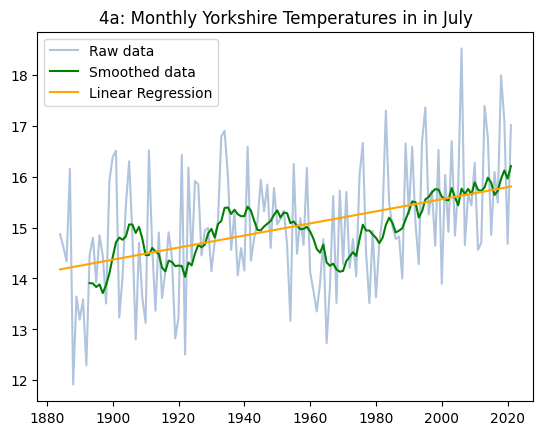

The equation of the linear regression line is y=0.01187 x - 8.19


In [56]:
x_vals = df_yorks_temp[df_yorks_temp["month_number"] == 7]["calendar_year"]
y_vals = df_yorks_temp[df_yorks_temp["month_number"] == 7]["tas"]

plot_raw_smoothed(x_vals,y_vals,10,title = "4a: Monthly Yorkshire Temperatures in in July")


c:\Users\omarc\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\omarc\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


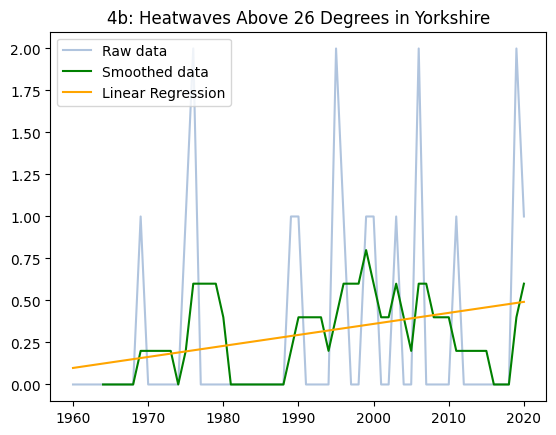

The equation of the linear regression line is y=0.00656 x - 12.75


In [57]:
heatwaves26 = FindHeatWaves(26)
plot_raw_smoothed(heatwaves26["Year"],heatwaves26["No. of heatwaves"],5,title = "4b: Heatwaves Above 26 Degrees in Yorkshire")

Taking the Met Office's current threshold, we see that there are relatively few heatwaves, though there is a suggestion that they are becoming more frequent (4 during the first 30 years of data, and 11 in the next 30 years).

To investigate this further, we looked at the frequencies if we set the threshold a bit lower - at 20 degrees.

c:\Users\omarc\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\omarc\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


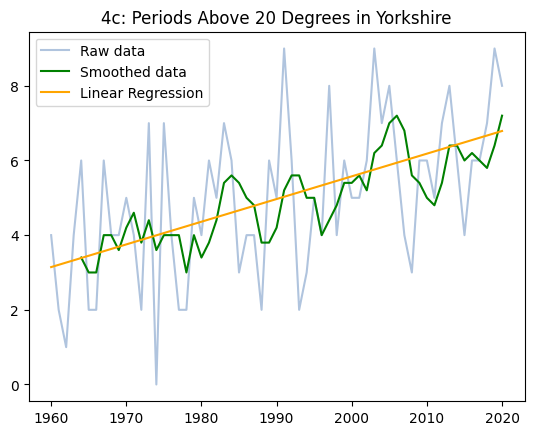

The equation of the linear regression line is y=0.06076 x - 115.95


In [58]:
heatwaves20 = FindHeatWaves(20)
plot_raw_smoothed(heatwaves20["Year"],heatwaves20["No. of heatwaves"],5,title = "4c: Periods Above 20 Degrees in Yorkshire")

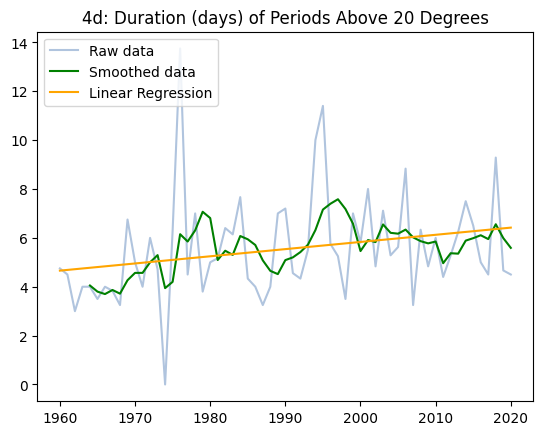

The equation of the linear regression line is y=0.02933 x - 52.84


In [59]:
plot_raw_smoothed(heatwaves20["Year"],heatwaves20["Mean duration"],5,title = "4d: Duration (days) of Periods Above 20 Degrees")

Now there is a clear trend towards more episodes of relatively high temperatures, and some indication that there is an increase in their duration.

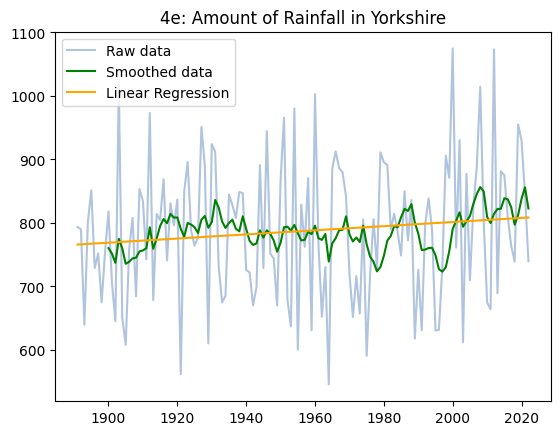

The equation of the linear regression line is y=0.32491 x + 151.55


In [60]:
plot_raw_smoothed(drf_df["Year"],drf_df["Total volume"],10,title = "4e: Amount of Rainfall in Yorkshire")

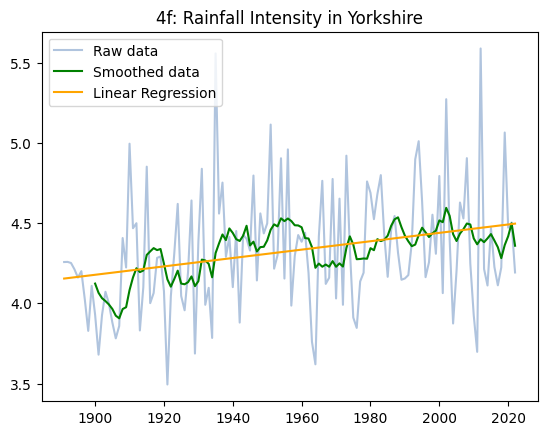

The equation of the linear regression line is y=0.00261 x - 0.78


In [61]:
plot_raw_smoothed(drf_df["Year"],drf_df["Mean daily rainfall"],10,title = "4f: Rainfall Intensity in Yorkshire")


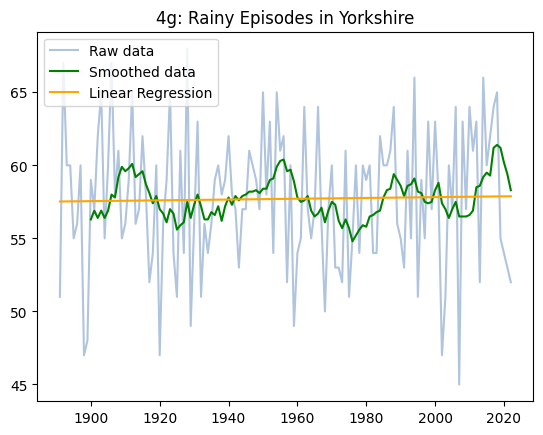

The equation of the linear regression line is y=0.00274 x + 52.35


In [62]:
plot_raw_smoothed(drf_df["Year"],drf_df["No. rainy episodes"],10,title = "4g: Rainy Episodes in Yorkshire")

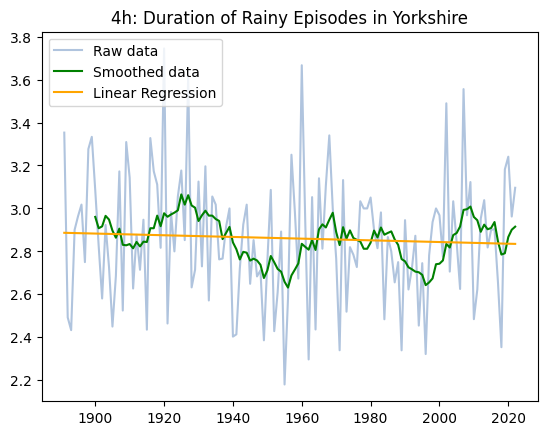

The equation of the linear regression line is y=-0.00039 x + 3.63


In [63]:
plot_raw_smoothed(drf_df["Year"],drf_df["Mean duration"],10,title = "4h: Duration of Rainy Episodes in Yorkshire")

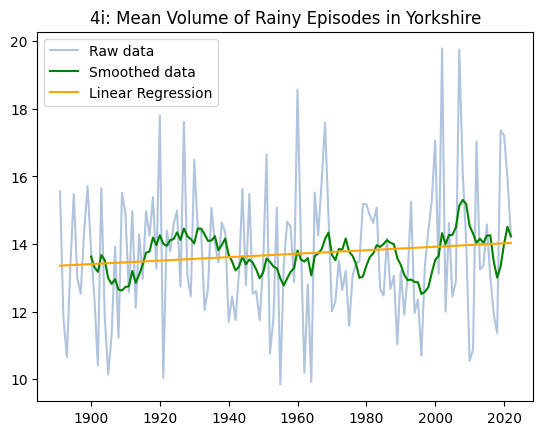

The equation of the linear regression line is y=0.00512 x + 3.69


In [64]:
plot_raw_smoothed(drf_df["Year"],drf_df["Mean volume"],10,title = "4i: Mean Volume of Rainy Episodes in Yorkshire")

# Conclusion (5 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections._

### Achievements
_As we had expected, the most popular fridge magnets were of the 'meme' kind.
We were surprised that 'smiley' fridge magnets were less common than expected.
We conjecture that this is because, although they are apparently very popular,
few fridges display more than one smiley. However, 'meme' based magnets can
be found in large numbers, even on quite small fridges._

### Limitations

_The project was limited to a small number of fridge magents, which may not be
typical of fridges found in the global fridge magnet ecosystem._

### Future Work

_In future work we would like to obtain more diverse data and study fridge magnets 
beyond the limited confines of student accomodation. We hypothesise that there
could be a link between fridge magnet types and social class and/or educational
achievement._